# Extract data

Data extraction can be one of the more anticipated tasks that a language model can solve – often, extraction may require a deeper analysis of an image with which previous solutions have not always coped well.

## Imports and model init

In [1]:
from pathlib import Path

from openai import OpenAI
from gpt4_vision_playground.config import get_openai_key
from IPython.display import Image
from gpt4_vision_playground.config import get_git_root
from gpt4_vision_playground.vision_utils import system_message, user_message_with_image

In [2]:
DATA_DIRECTORY = get_git_root() / "data"
INVOICE = DATA_DIRECTORY/ 'invoice_example.jpeg'
HANDWRITTEN_LETTER = DATA_DIRECTORY/ 'letter.png'
SHOP_LIST = DATA_DIRECTORY/ 'list.png'
LOGO = DATA_DIRECTORY/ 'logo.png'
OPENAI_CLIENT = OpenAI(api_key=get_openai_key())

## QA prepare

In [3]:
def answer_question_for_image(question: str, image_path: Path) -> None:
    print("Question:")
    print(question)
    display(Image(filename=image_path.as_posix()))
    response = OPENAI_CLIENT.chat.completions.create(
        model="gpt-4-vision-preview",
        messages=[
            system_message(
                content="You are an artificial intelligence responsible for answering questions related to images. "
                        "Your main task is extract data from document – respond only real data, don't imgine anything.|"
            ),
            user_message_with_image(
                content=question,
                image_file=image_path
            )
        ],
        max_tokens=4096  # max size
    )
    print("Answer:")
    print(response.choices[0].message.content)

## Invoice extracrt data

Question:
Return details of invoice. Try return data as dictionary / lists.


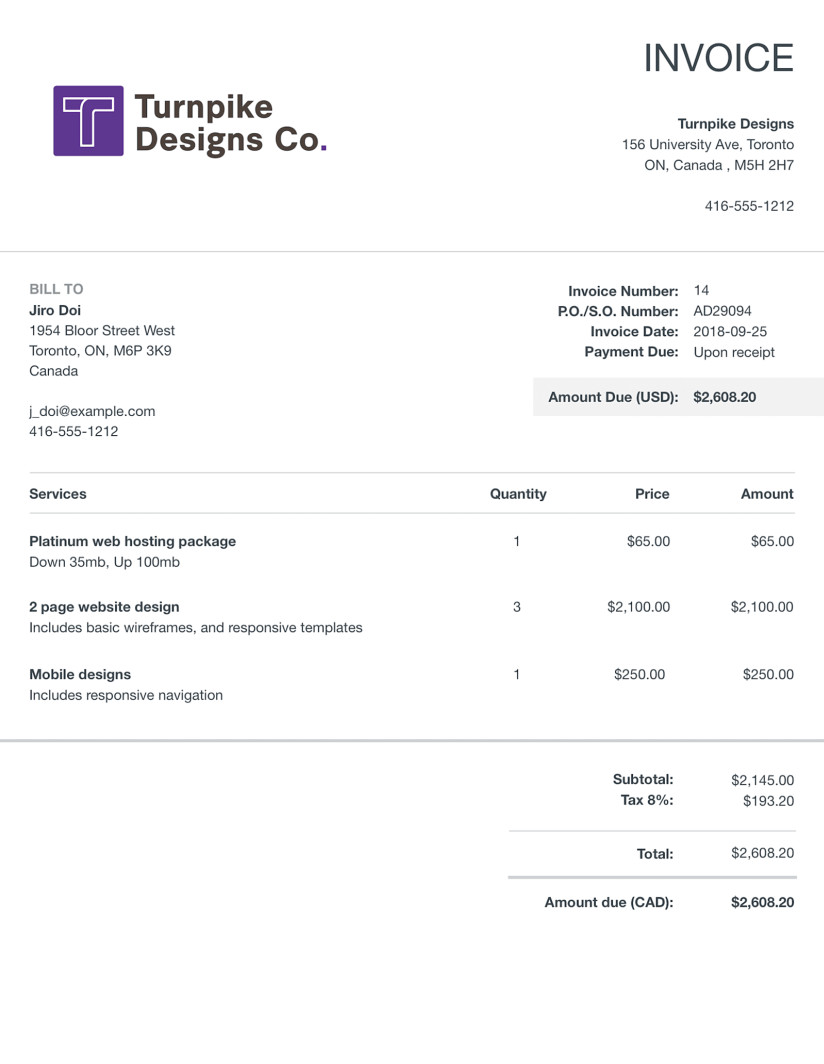

Answer:
Here's the extracted data from the invoice in the form of a dictionary:

```python
invoice_details = {
    "Company": "Turnpike Designs Co.",
    "Company_Address": "156 University Ave, Toronto, ON, Canada, M5H 2H7",
    "Company_Phone": "416-555-1212",

    "Bill_To": {
        "Name": "Jiro Doi",
        "Address": "1954 Bloor Street West Toronto, ON, M6P 3K9 Canada",
        "Email": "j.doi@example.com",
        "Phone": "416-555-1212"
    },

    "Invoice": {
        "Invoice_Number": "14",
        "PO_SO_Number": "AD20904",
        "Invoice_Date": "2018-09-25",
        "Payment_Due": "Upon receipt"
    },

    "Services": [
        {
            "Description": "Platinum web hosting package",
            "Quantity": 1,
            "Price": "$65.00",
            "Amount": "$65.00"
        },
        {
            "Description": "2 page website design",
            "Quantity": 3,
            "Price": "$2,100.00",
            "Amount": "$2,100.00"
        },
        {
        

In [4]:
answer_question_for_image("Return details of invoice. Try return data as dictionary / lists.", INVOICE)

## Handwritten OCR

Question:
Ocr the letter.


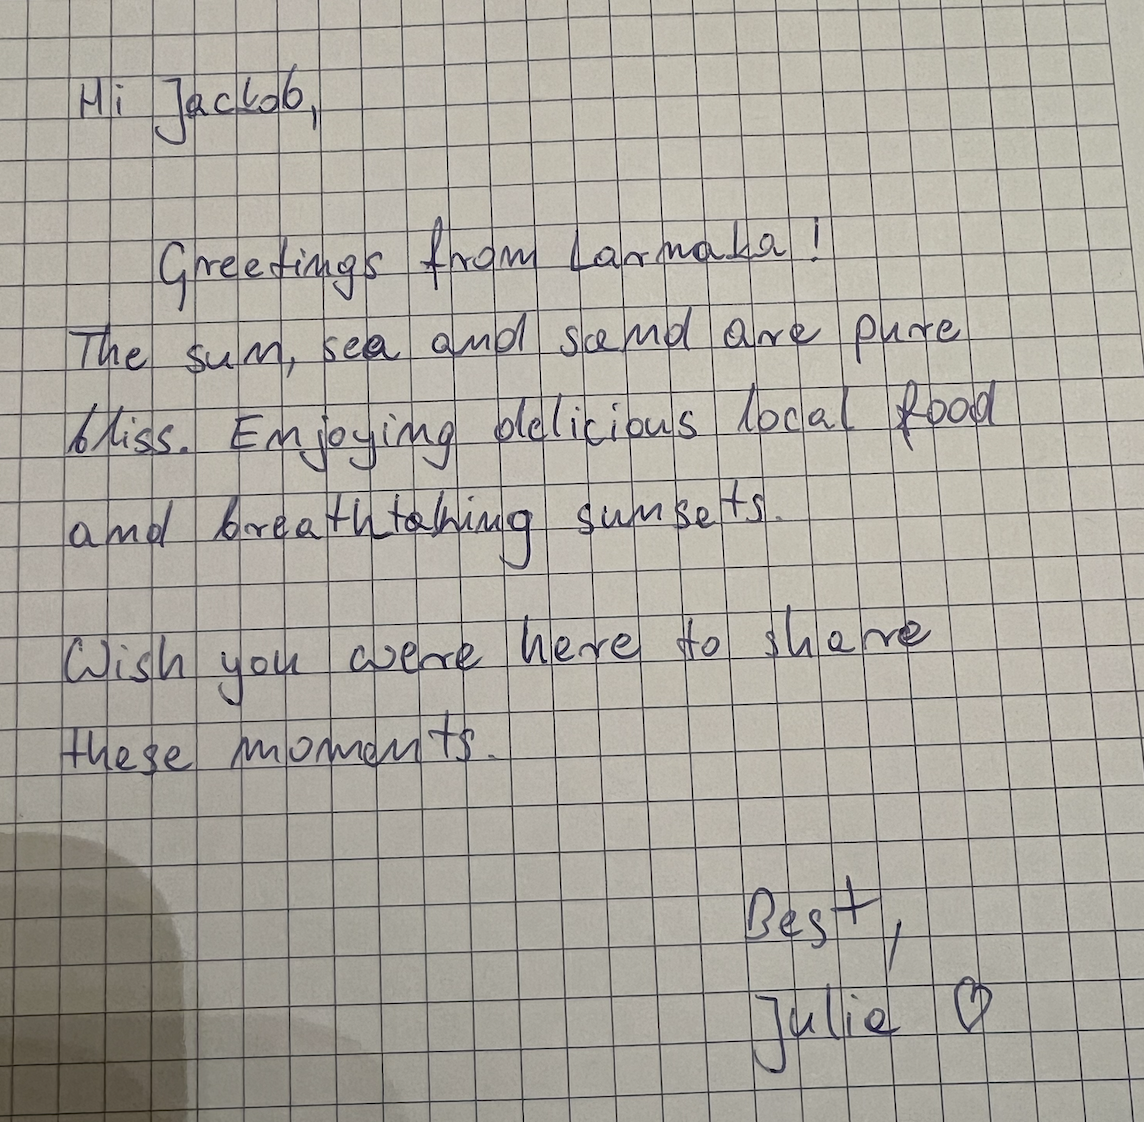

Answer:
Hi Jacob,

Greetings from Lanzarote!
The sun, sea and sand are pure bliss. Enjoying delicious local food and breathtaking sunsets.

Wish you were here to share these moments.

Best,
Julie ❤️


In [5]:
answer_question_for_image("Ocr the letter.", HANDWRITTEN_LETTER)

Question:
Ocr the shop list.


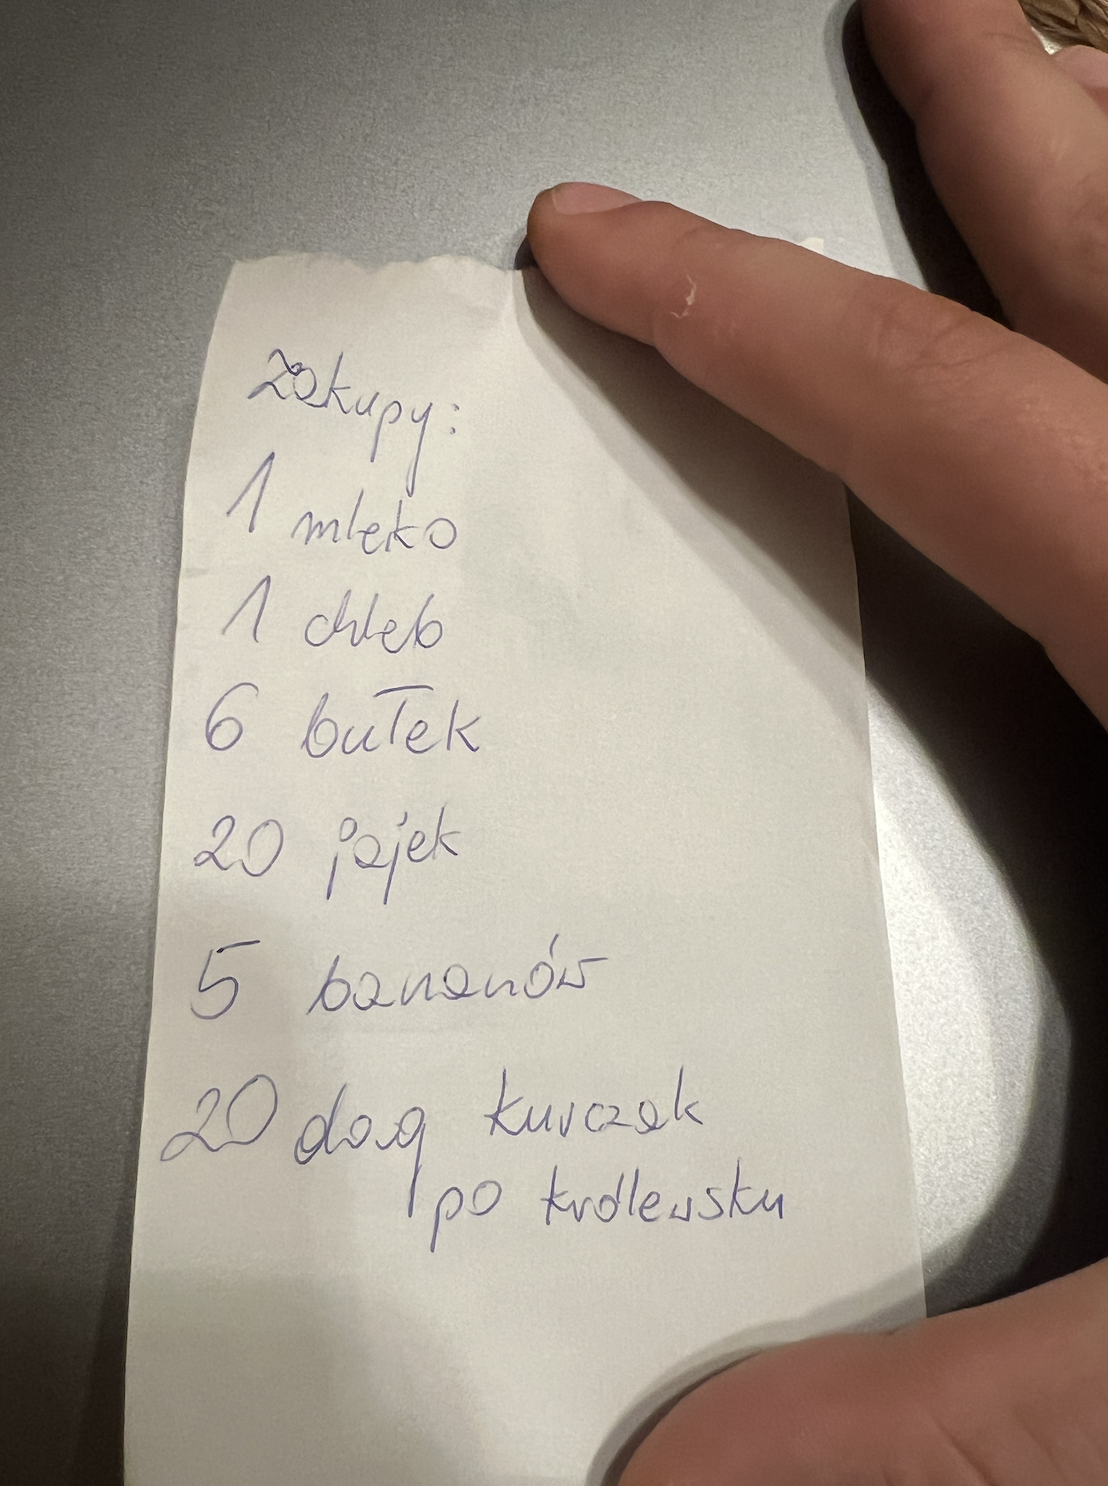

Answer:
The shopping list reads:

zakupy:
1 mleko
1 chleb
6 bułek
20 jajek
5 bananów
20 dług. kawałek po królewsku

This appears to be a list in Polish, listing common grocery items such as milk, bread, rolls, eggs, bananas, and a specific type of sliced meat ("dług. kawałek po królewsku", possibly referring to a "long piece of royal-style meat").


In [6]:
answer_question_for_image("Ocr the shop list.", SHOP_LIST)

Question:
Ocr the logo.


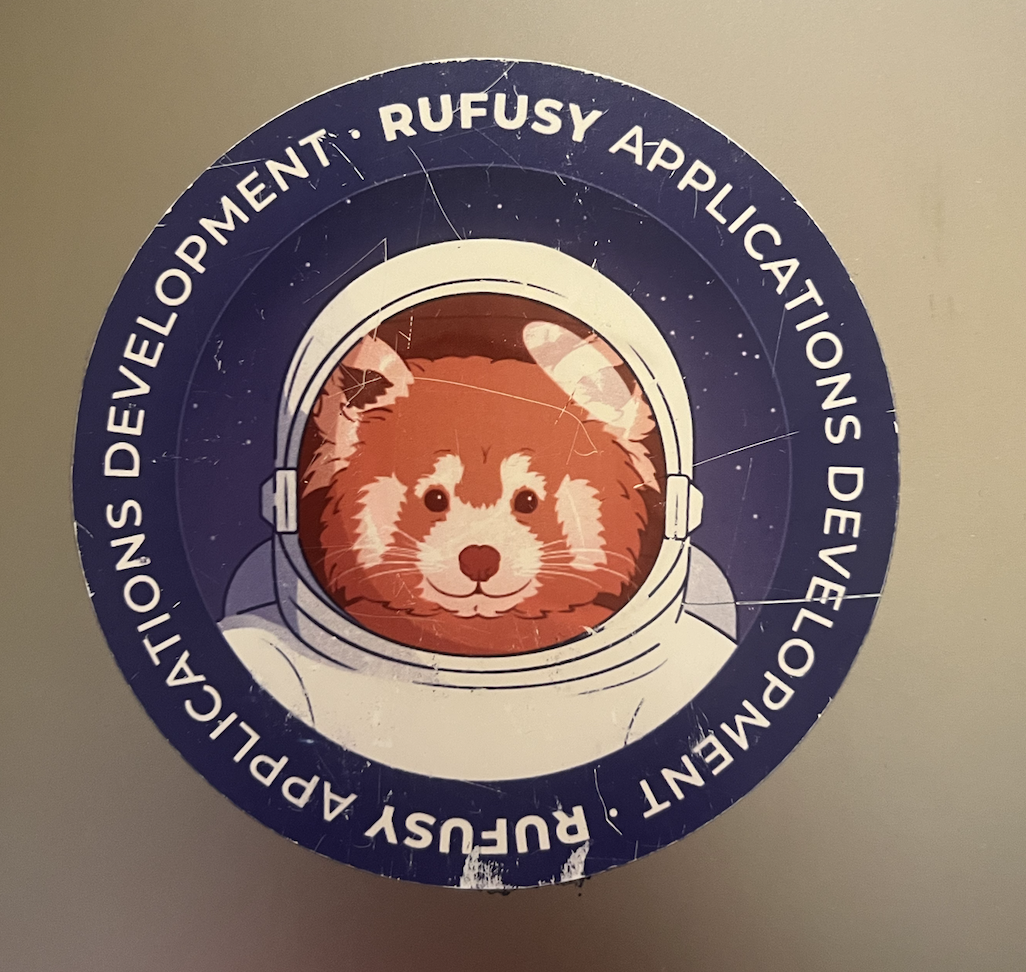

Answer:
The text in the logo reads: "RUFSY APPLICATIONS DEVELOPMENT".


In [7]:
answer_question_for_image("Ocr the logo.", LOGO)

## Observation

I decided to test two data extraction tasks. I didn't pay attention to defining the exact form of the returned response.

The first one was analyzing an invoice. As you can see, the model handled it perfectly. Although the data was returned without an imposed format because it was not specified, you can see great potential in this.

The second task was OCR of documents - handwritten and printed text were checked. Handwriting coped quite well - even emoticons were read, unfortunately, there were cases where the OCR made a mistake - it returned completely different words, text was in polish language. The printed text was flawless.
 
It's important to remember that this is an analysis of only a few examples that demonstrate the possibilities offered by the model. More in-depth analyses should be carried out on larger data sets.